<img src="https://communications.univie.ac.at/fileadmin/_processed_/csm_Uni_Logo_2016_2f47aacf37.jpg" 
     alt="Logo Universität Wien" 
     width="200"/>

# Practical Machine Learning for Natural Language Processing - 2023 SS  

### Assigment 2 - Generators and Classes   

In this assigment we are going to play with generators and instances/classes - structures that retain state.  

***

### 1. Alea Iacta Est  

(a) Using [generator functions](https://github.com/rsouza/Python_Course/blob/master/Notebooks/Python_Basic/03_Functions.ipynb), create an object that emulates an eight-sided dice (1-8) that is biased, such that the probability of this generator function returning a certain value is proportional to the value itself (i.e. the face "6" is 3 times more likely to come out than face "2");  

 <img src="https://cdn11.bigcommerce.com/s-70184/images/stencil/608x608/products/532/7428/d8-dice-blue__64321.1664335674.jpg" alt="8-Dice" style="width:250px;height:300px;"> 

(b) Using [Matplotlib](https://matplotlib.org/) plt.plot or plt.hist commands, show graphically the result of 10000 casts of the die;  

(c) Modify this generator function so that it terminates automatically when all possible values (1,2,3,4,5,6,7,8) have been cast at least once. In this case, it will return the total absolute time that has elapsed since the first iteration.  (hint: a function can have both **return** and **yield** commands)  

https://pynative.com/python-weighted-random-choices-with-probability/

In [1]:
# a)
import random

def alea_lacta_est(sides):
    
    values = [*range(1, sides+1)]
    n = sum(values)
    probabilities = [i/n for i in range(1, sides+1)]
    
    while True:
        roll = random.choices(values, weights = probabilities, k = 1)
        yield roll[0]
        
for i in range(0, 10):
    print(next(alea_lacta_est(8)))

8
2
6
7
1
8
7
7
5
3


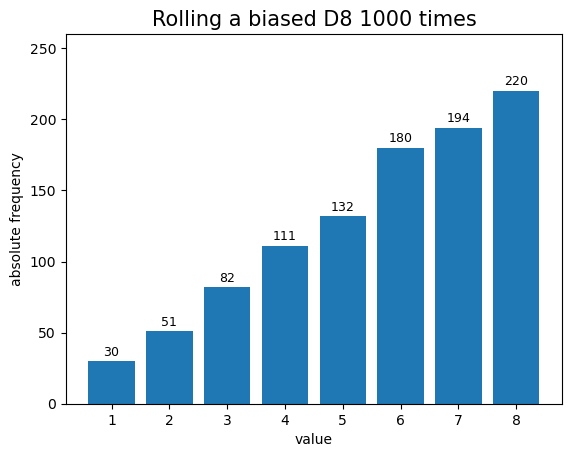

In [12]:
# b)
import collections
import itertools
from matplotlib import pyplot as plt

casts = [next(alea_lacta_est(8)) for i in range(0, 1000)]
casts = collections.Counter(casts)
casts = {k: v for k, v in sorted(casts.items(), key = lambda item: item[1])}

barplot = plt.bar(range(len(casts)), list(casts.values()), align = 'center')
plt.xticks(range(len(casts)), list(casts.keys()))

plt.title('Rolling a biased D8 1000 times', fontsize=15)
plt.xlabel('value')
plt.ylabel('absolute frequency')
plt.bar_label(barplot, labels = list(casts.values()), label_type = 'edge', padding = 2, fontsize = 9)
plt.ylim([0, 260])

plt.show()

In [13]:
# c)
import random
import time

def modified(sides, casts, output = False):
    now = time.time()
    
    def alea_lacta_est(sides):
        values = [*range(1, sides+1)]
        n = sum(values)
        probabilities = [i/n for i in range(1, sides+1)]
        while True:
            roll = random.choices(values, weights = probabilities, k = 1)
            yield roll[0]
    
    possible_values = [*range(1, sides+1)]
    terminate = []
    for i in range(0, casts):
        if all(item in terminate for item in possible_values):
            break
        else: 
            cast = next(alea_lacta_est(8))
            terminate.append(cast)
            if output:
                print(cast)
    
    return (time.time() - now)

In [11]:
modified(8, 1000)

0.0007138252258300781

### 2. A ticket to the first Class    

+ Create a Class called "Elevator". Each instance of this class receives as parameters the number of floors in the building and starts the elevator on the lowest floor.  
+ This Class should have methods and properties to allow the elevator to:
<br></br>
    + Receive a call - user(s) press a button to go to specific floor(s);  
    + Receive a floor as a destination - when users enter the elevator, each one may press a button to choose destination floor;  
    + Store and inform which floor the elevator is at each moment(consider that trips for consecutive floors takes 5 seconds, and stopping takes 10 seconds);  
    + Store and inform which users are in the elevator;  
    + Store and inform the sequence of floors yet to be visited;  
    + Store the number of times the elevator stopped in each floor (passing through the floor without "stopping" on the floor does not count);  
    + Refuses commands to go to inexistent floors.  
<br></br>
+ Simulate the behavior of the elevator serving ten users, each one calling from a random floor, and chosing a random destination floor.   
+ Graphically illustrate the current elevator position for the requested simulation.   
+ (BONUS) Create a smart building simulator, controlling calls made to n > 1 elevators and routing elevator properly.  

### Documentation
The Elevator class simulates the operation of an elevator in a building, allowing users to call and travel to different floors.
+ This elevator class has following properties:
<br><br>
    + num_floors: number of floors in the building
    + sequence_floors: a dictionary with the floors as keys and boolean values to dictate if the elevator has to visit the floor
    + users: input destinations are stored in this list
    + floor_counter: a dictionary storing the stops of each floor
    + current_floor: the current position of the elevator
    + max_floor: this is the maximum floor of sequence_floors which is set to True
    + lowest_floor: this is the lowest floor of sequence_floors which is set to True
    + mode_up: a boolean variable stating if the elevator is in up-mode or down-mode
    + num_users: the number of users currently in the elevator
<br><br>
+ The class has following methods:
<br><br>
    + update_max() and update_lowest(): update max_floor and lowest_floor
    + receive_call(floor): takes a floor number as input, sets this floor key in sequence_floors to True and calls update_max() and update_lowest()
    + receive_destinations(floors): receives input floor(s), sets the floor key(s) in sequence_floors to True, adds destinations to users and updates num_users, calls update_max() and update_lowest()
    + plot_position(key): takes the current position of elevator of input and plots it
    + stop(key): takes current position as input, upates current_floor, calls plot_position(key), sets the key of current position in sequence_floors to false, drops the current floor from users and updates num_users
    + travel(): if mode_up is True, the elevator executes sequence_floors in ascending order, calls stop(key) if the key value in sequence_floors is True; if the key value is False, current_position is updated and plotted with plot_position(key, break_floor = None); after arriving at max_floor, update_max() and update_lowest() are called and mode_up is set to False; if mode_up is False, the elevator performs the described procedure in descending order and sets mode_up to True; the function has an optional break_floor parameter, which allows for interruption of the processing of sequence_floors at a certain floor number
    + run_elevator(self, break_floor = None): checks if the elevator is stuck in the wrong mode in the first floor or maximum floor and switches mode if that's the case, then proceeds with callin the travel() function
<br><br>
+ Logic of the elevator class:
<br><br>
    + The elevator performs its task in a cyclical order: It's either in up or down mode
    + It only goes so far or so low as the highest or lowest requested user input and then switches its mode
<br><br>
+ Intended use of the class:
<br><br>
    + Use receive_call() to tell elevator to go to floor where user is waiting
    + Use run_elevator() to get elevator to the floor where the user is waiting
    + Use receive_destination() to store the input destination of the user
    + Use run_elevator() to move the elevator to the desired floor and let the user get off the elevator

In [1]:
import time
import numpy as np
from matplotlib import pyplot as plt

class Elevator:
    def __init__(self, num_floors):
        self.num_floors = num_floors
        self.sequence_floors = {floor: False for floor in range(1, num_floors+1)}
        self.users = []
        self.floor_counter = {floor: 0 for floor in range(1, num_floors+1)}
        self.current_floor = 1
        self.max_floor = 1
        self.lowest_floor = 1
        self.mode_up = True
        self.num_users = 0
    

    
    def update_max(self):
        if all(value == False for value in self.sequence_floors.values()) == True:
            self.max_floor = 0
        else:
            self.max_floor =  max([i for i in self.sequence_floors.items() if i[1] == True])[0]

            
    
    def update_lowest(self):
        if all(value == False for value in self.sequence_floors.values()) == True:
            self.lowest_floor = 0
        else:
            self.lowest_floor =  min([i for i in self.sequence_floors.items() if i[1] == True])[0]
            
            
    
    def receive_call(self, floor):
        if floor == self.current_floor:
            print(f'Elevator already at floor number {floor}')
        else: 
            if self.sequence_floors.get(floor) is not None:
                self.sequence_floors.update({floor: True})
                self.update_max()
                self.update_lowest()
            else:
                print(f'Floor {floor} does not exist in the building. Please enter a valid floor number.')
            
            
            
    def receive_destinations(self, floors):
        if type(floors) is int:
            if floors == self.current_floor:
                print('Elevator already at desired floor.')
            else: 
                if self.sequence_floors.get(floors) is not None:
                    self.sequence_floors.update({floors: True})
                    self.users.append(floors)
                    self.num_users = len(self.users)
                else:
                    print(f'Floor {floors} does not exist in the building. Please enter a valid floor number.')
                
        else:
            for floor in floors:
                if floor == self.current_floor:
                    print('Elevator already at desired floor.') 
                else:
                    if self.sequence_floors.get(floor) is not None:
                        self.sequence_floors.update({floor: True})
                        self.users.append(floor)
                        self.num_users = len(self.users)         
                    else:
                        print(f'Floor {floor} does not exist in the building. Please enter a valid floor number.')
                    
        self.update_max()
        self.update_lowest()
        
        
        
    def plot_position(self, key):

        plt.rcParams['figure.figsize'] = [2, 3.5]

        x = [1]
        y = [key]

        plt.xticks([1], ['Elevator'])
        plt.ylim(1, self.num_floors)
        plt.ylabel('Current floor')
        plt.grid()

        plt.plot(x, y, marker = 's', markersize = 20)
        
        # Set the y-ticks to integers
        plt.yticks(np.arange(1, self.num_floors+1, 1))
        
        plt.show()    
            
            
            
    def stop(self, key):
        # update current floor
        self.current_floor = key
        # plotting current_floor
        self.plot_position(key)
        # setting passed floor value to false
        self.sequence_floors[key] = False
        # removing dropping out users 
        self.users = [floor for floor in self.users if floor != key]
        self.num_users = len(self.users)
        
    
    
    def travel(self, break_floor = None):

        if self.mode_up == True:
            # update sequence of floors in ascending order
            for key in range(self.current_floor + 1, self.max_floor + 1):
                # travelling to consecutive floor
                #time.sleep(5)
                
                if self.current_floor == break_floor:
                    break

                # elevator stops if floor is true
                elif self.sequence_floors[key] == True:
                    self.stop(key)
                    self.floor_counter[key] += 1
                    #time.sleep(10)

                # elevator passes floor if floor is false
                else:
                    # update current floor
                    self.current_floor = key
                    # plotting current floor
                    self.plot_position(key)

            # updating max and lowest floors to vistit
            self.update_max()
            self.update_lowest()
            # switching mode of elevator
            self.mode_up = False


        else:
            # update sequence of floors in descending order
            for key in range(self.current_floor - 1, self.lowest_floor - 1, -1):
                # travelling to consecutive floor
                #time.sleep(5)

                if self.current_floor == break_floor:
                    break
                
                # elevator stops if floor is true
                elif self.sequence_floors[key] == True:
                    self.stop(key)
                    self.floor_counter[key] += 1
                   #time.sleep(10)

                # elevator passes floor if floor is false
                else:
                    # update current floor
                    self.current_floor = key
                    # plotting current floor
                    self.plot_position(key)

            # updating max and lowest floors to vistit
            self.update_max()
            self.update_lowest()
            # switching mode of elevator
            self.mode_up = True
            
    
    
    def run_elevator(self, break_floor = None):
        true_values = []
        for floor in self.sequence_floors:
            if self.sequence_floors.get(floor) is True:
                true_values.append(floor) 
                
        if break_floor != None and self.sequence_floors.get(floor) is None:
            raise ValueError(f"Invalid floor number: {break_floor}. Please enter a valid floor number.")
  
        else:
            
            if len(true_values) == 1 and true_values[0] > self.current_floor and self.mode_up == False:
                self.mode_up = True
                self.travel()
                
            elif len(true_values) == 1 and true_values[0] < self.current_floor and self.mode_up == True:
                self.mode_up = False
                self.travel()
            
            elif self.mode_up == False and self.current_floor == 1:
                self.mode_up = True
                self.travel()

            elif self.mode_up == True and self.current_floor == self.num_floors:
                self.mode_up = False
                self.travel()

            else:
                self.travel()

User 1 is calling from floor 2


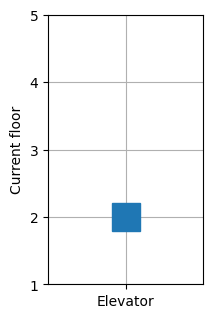

User 1 enters the elevator and wants to go to floor 5


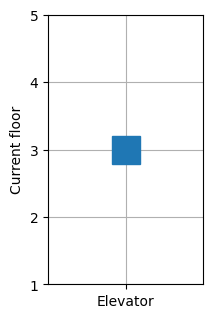

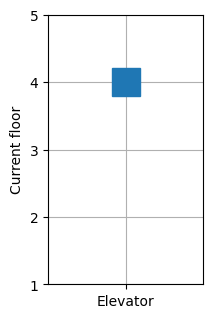

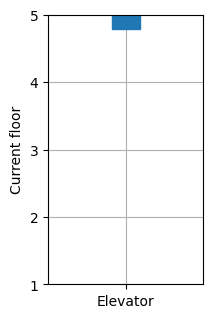

Elevator halts at floor 5 and user 1 gets off the elevator
User 2 is calling from floor 5
Elevator already at floor number 5
User 2 enters the elevator and wants to go to floor 4


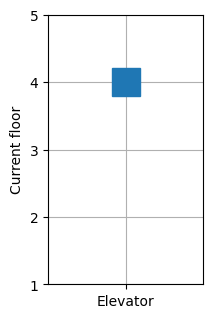

Elevator halts at floor 4 and user 2 gets off the elevator
User 3 is calling from floor 4
Elevator already at floor number 4
User 3 enters the elevator and wants to go to floor 4
Elevator already at desired floor.
User 4 is calling from floor 4
Elevator already at floor number 4
User 4 enters the elevator and wants to go to floor 3


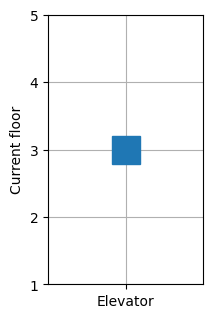

Elevator halts at floor 3 and user 4 gets off the elevator
User 5 is calling from floor 3
Elevator already at floor number 3
User 5 enters the elevator and wants to go to floor 4


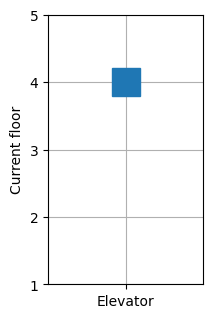

Elevator halts at floor 4 and user 5 gets off the elevator
User 6 is calling from floor 3


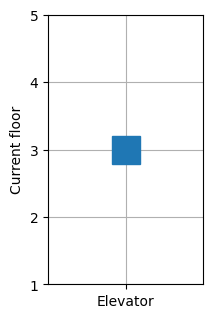

User 6 enters the elevator and wants to go to floor 1


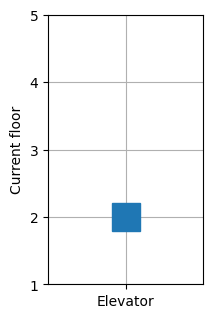

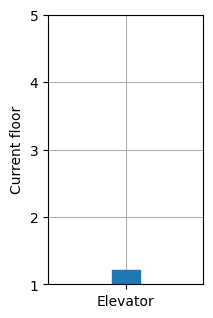

Elevator halts at floor 1 and user 6 gets off the elevator
User 7 is calling from floor 3


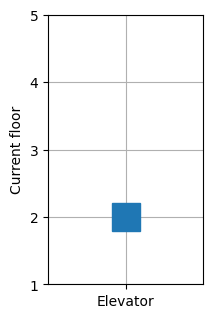

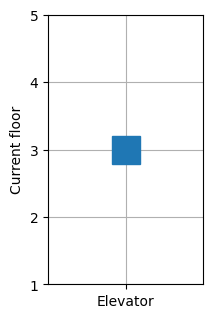

User 7 enters the elevator and wants to go to floor 2


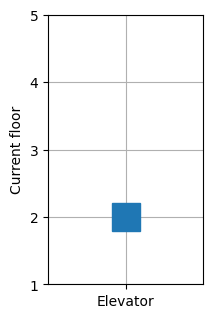

Elevator halts at floor 2 and user 7 gets off the elevator
User 8 is calling from floor 5


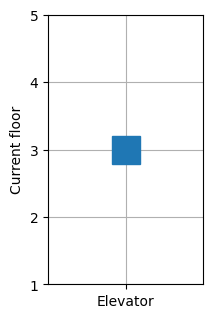

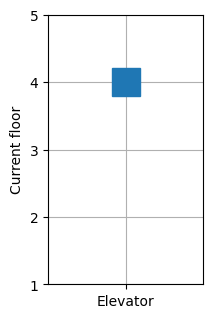

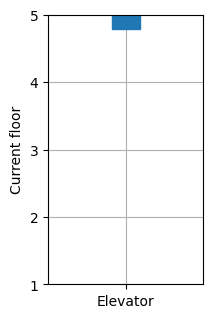

User 8 enters the elevator and wants to go to floor 2


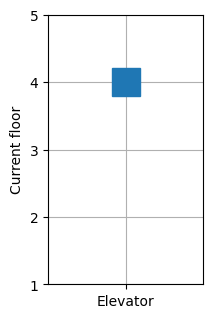

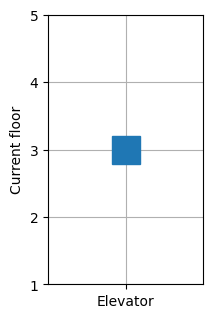

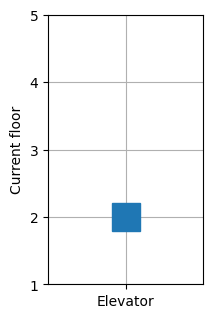

Elevator halts at floor 2 and user 8 gets off the elevator
User 9 is calling from floor 5


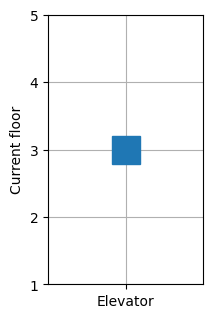

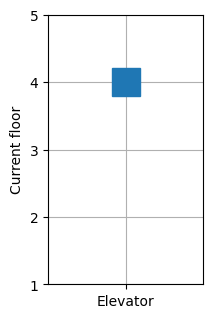

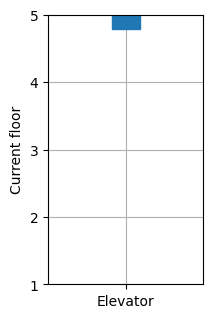

User 9 enters the elevator and wants to go to floor 1


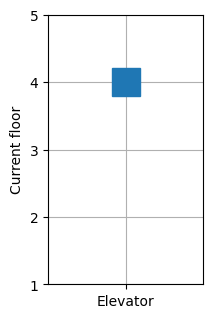

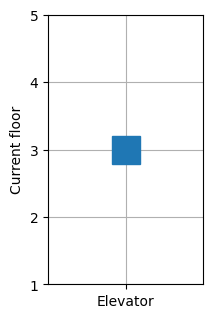

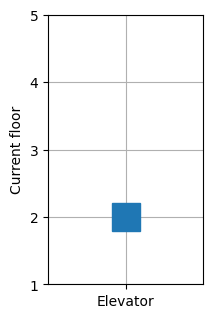

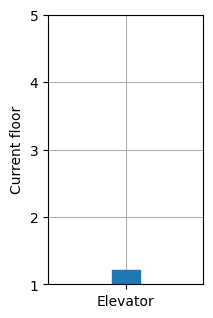

Elevator halts at floor 1 and user 9 gets off the elevator
User 10 is calling from floor 5


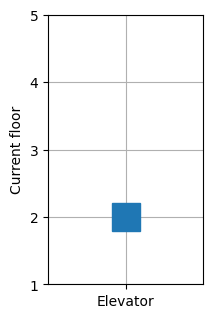

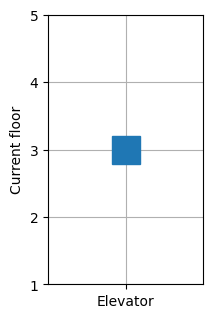

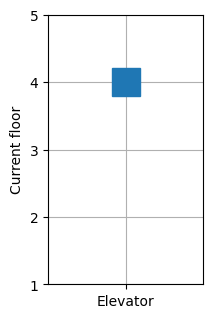

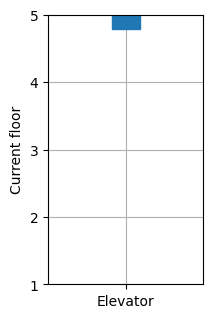

User 10 enters the elevator and wants to go to floor 2


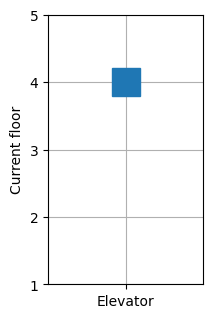

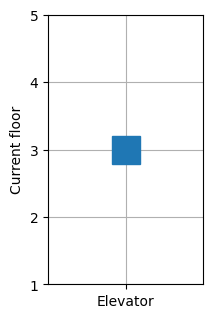

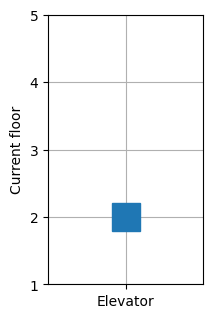

Elevator halts at floor 2 and user 10 gets off the elevator


In [2]:
import random


floors = 5
users = 10
elevator = Elevator(floors)


for user in range(0, users):
    call = random.randint(1, floors)
    destination = random.randint(1, floors)
    
    print(f'User {user+1} is calling from floor {call}')
    elevator.receive_call(call)
    if elevator.current_floor != call:
        elevator.run_elevator()
        
    print(f'User {user+1} enters the elevator and wants to go to floor {destination}')
    elevator.receive_destinations(destination)
    if elevator.current_floor != destination:
        elevator.run_elevator()
        print(f'Elevator halts at floor {destination} and user {user+1} gets off the elevator')